## Part 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv('EWCS_2016.csv')

In [ ]:
df 

,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
0,1,63,3,3,3,3,3,2,2,2,2
1,2,58,2,3,2,3,2,2,3,2,2
2,2,32,2,2,3,2,3,2,2,2,2
3,1,35,3,2,2,2,3,2,2,2,2
4,2,27,2,2,3,3,2,2,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...
7808,1,35,3,2,3,2,3,4,3,3,2
7809,1,53,2,1,2,1,2,1,1,2,2
7810,2,39,1,1,1,1,1,2,5,2,1
7811,2,75,1,1,1,5,1,1,1,3,1


<AxesSubplot:>

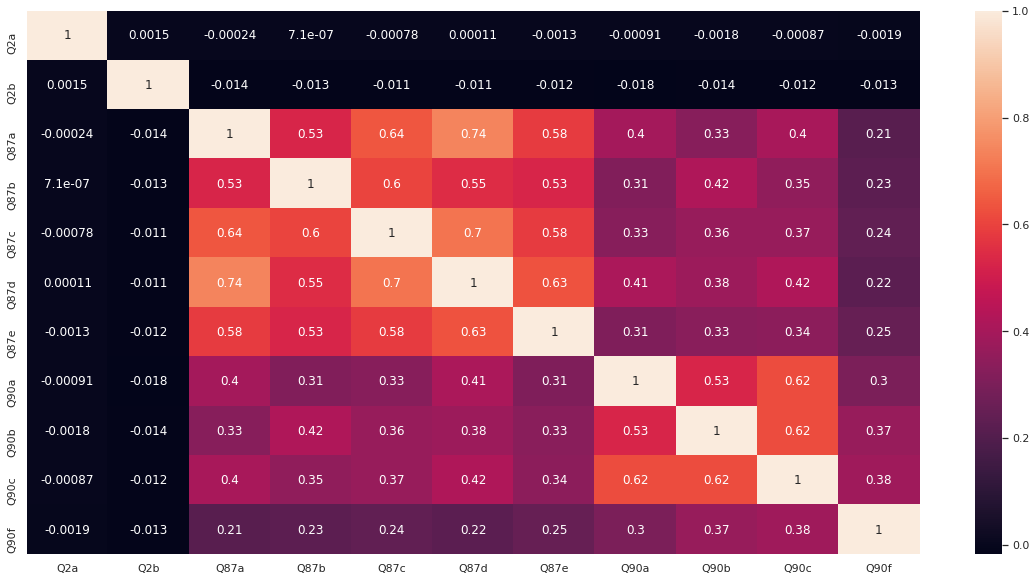

In [ ]:
plt.figure(figsize = (20, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [ ]:
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

scaler = StandardScaler().fit(df)
scaled = scaler.transform(df)

In [ ]:
!pip install pca

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed to capture [80.0%] explained variance using the [11] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [6] that covers the [80.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


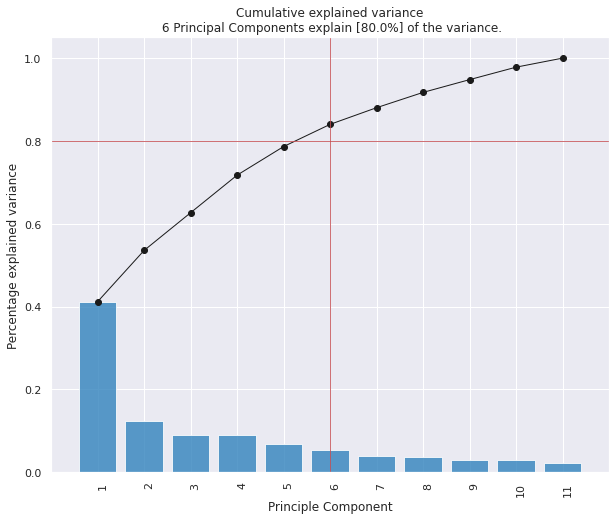

<Figure size 432x288 with 0 Axes>

In [ ]:
from pca import pca

model = pca(n_components=0.8)

results = model.fit_transform(scaled)

fig, ax = model.plot()

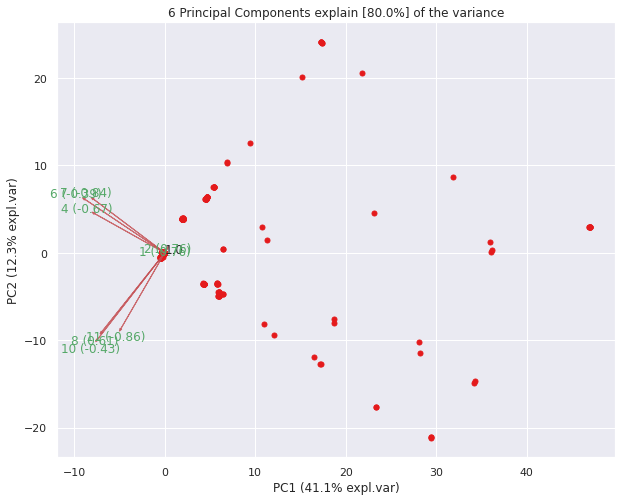

In [ ]:
fig, ax = model.biplot(n_feat=8, legend=False)

In [ ]:
tf = pd.DataFrame(results['topfeat'])
bck = []
for i in tf['feature']:
    bck.append(df.columns[int(i)-1])
tf['feature'] = bck
tf

,PC,feature,loading,type
0,PC1,Q87d,-0.387042,best
1,PC2,Q90c,-0.434454,best
2,PC3,Q2a,-0.760249,best
3,PC4,Q2b,0.760092,best
4,PC5,Q90f,-0.861661,best
5,PC6,Q87b,-0.671158,best
6,PC7,Q87e,-0.840448,best
7,PC8,Q90a,0.610979,best
8,PC9,Q90c,-0.635148,best
9,PC10,Q87c,-0.604532,best


## Part 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
df_mat = pd.read_csv('student-mat.csv', sep = ';')
df_por = pd.read_csv('student-por.csv', sep = ';')

In [ ]:
df = pd.concat([df_mat, df_por], ignore_index= True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
df_mat

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
if 'G1' in df.columns:
    df.drop(columns = ['G1'], inplace = True)

if 'G2' in df.columns:
    df.drop(columns = ['G2'], inplace = True)

<AxesSubplot:>

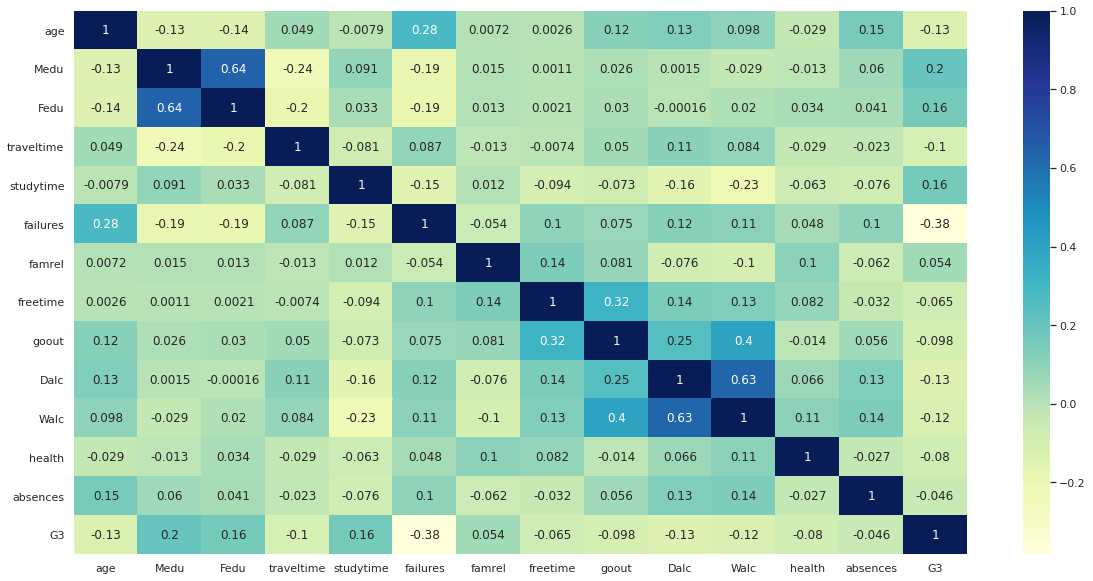

In [ ]:
plt.figure(figsize = (20, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu', annot=True)

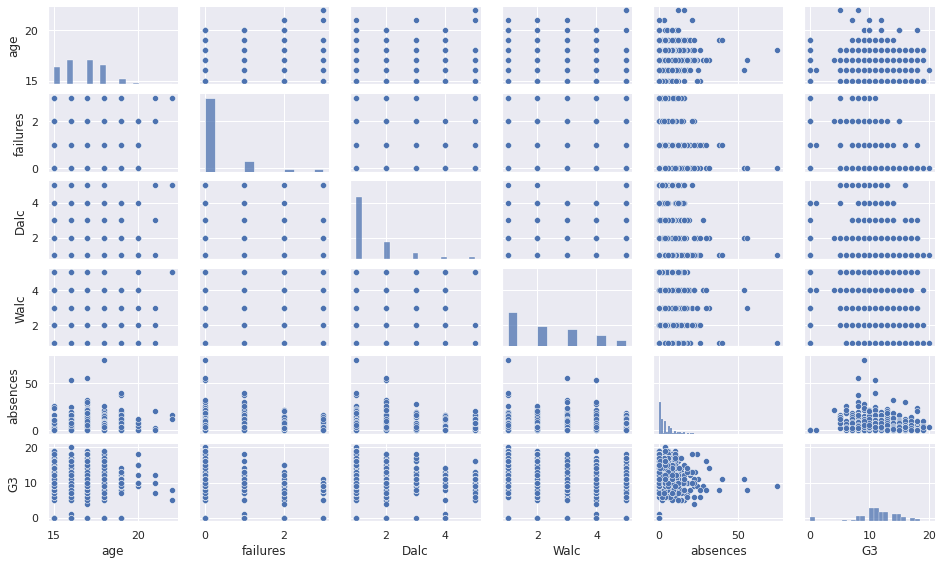

In [ ]:
m = df.drop(columns = ['Medu', 'Fedu', 'health', 'traveltime', 'studytime', 'freetime', 'goout', 'famrel'])
g = sns.pairplot(m, height=1.3)
g.fig.set_size_inches(14,8)

In [ ]:
if 'Fedu' in df.columns:
    df = df.drop(columns=['Fedu', 'Medu', 'Walc', 'romantic'])
df = pd.get_dummies(df, drop_first = True) 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'G3'), df.G3, test_size=0.3, random_state = 1)
regr=RandomForestRegressor(random_state = 1, max_depth = 11, max_features=11, n_estimators=235).fit(X_train,y_train)
y_pred=regr.predict(X_test)
mse_randomforest = mean_squared_error(y_test, y_pred, squared=True) 
print (mse_randomforest)

9.330208770206504


In [ ]:
!pip install lightgbm

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.metrics import mean_squared_error
model = LGBMRegressor(random_state=1, max_depth=2, n_estimators=200).fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_lgbm = mean_squared_error(y_test, y_pred, squared=True)
print(mse_lgbm)

10.187595181741656


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=1, max_depth=3, n_estimators=50).fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred, squared = True)
print(mse_gbr)

9.884264263375744


In [ ]:
!pip install xgboost

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(random_state=1, max_depth = 2, n_estimators = 50).fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred, squared = True)
print(mse_xgb)

10.520628002731415


In [ ]:
fort = {"Model" : [], "MSE" : []}
fort["Model"].append("Random Forest")
fort["Model"].append("Light GBM")
fort["Model"].append("Gradient boosting")
fort["Model"].append("XGBoost")
fort["MSE"].append(mse_randomforest)
fort["MSE"].append(mse_lgbm)
fort["MSE"].append(mse_gbr)
fort["MSE"].append(mse_xgb)
final = pd.DataFrame(fort)
final.sort_values(by = "MSE", ignore_index=True)

,Model,MSE
0,Random Forest,9.330209
1,Gradient boosting,9.884264
2,Light GBM,10.187595
3,XGBoost,10.520628


## Part 3 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv('bank.csv', sep = ';')

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
if 'duration' in df.columns:
    df.drop(columns = ['duration'], inplace = True)

<AxesSubplot:>

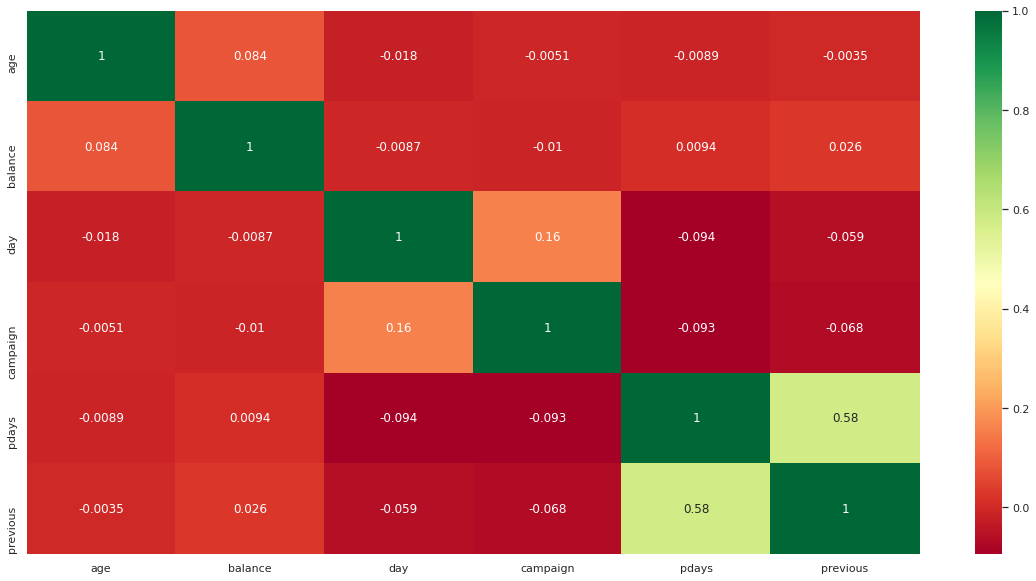

In [ ]:
plt.figure(figsize = (20, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,cmap='RdYlGn', annot=True)

In [ ]:
sns.set_palette('BuGn_r')

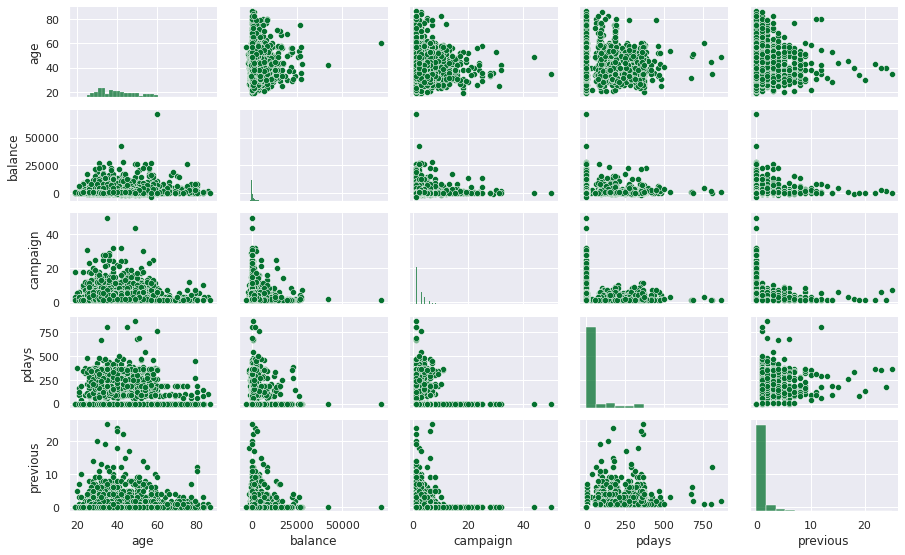

In [ ]:
g = sns.pairplot(df.drop(columns='day'), height=1.3)
g.fig.set_size_inches(14,8)

<AxesSubplot:>

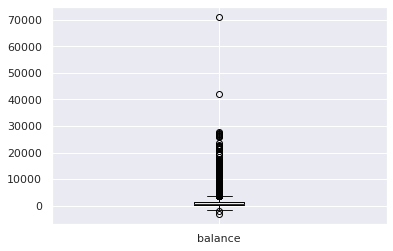

In [ ]:
df.boxplot(column = 'balance')

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(Q1-1.5*IQR)
print(Q3+1.5*IQR)

age            9.0
balance    -2047.5
day           -9.0
campaign      -2.0
pdays         -1.0
previous       0.0
dtype: float64
age           73.0
balance     3596.5
day           39.0
campaign       6.0
pdays         -1.0
previous       0.0
dtype: float64


In [ ]:
df['detector'] = 0
df['detector'][(df.balance >= 3596.5)] = 1
df['detector'][(df.balance <= -2047.5)] = 1
df

<ipython-input-48-f88f5c3dbcf5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['detector'][(df.balance >= 3596.5)] = 1
<ipython-input-48-f88f5c3dbcf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['detector'][(df.balance <= -2047.5)] = 1


,default,balance,housing,loan,day,month,campaign,pdays,previous,y,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,0,1787,0,0,19,10,1,-1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,4789,1,1,11,5,1,339,4,0,...,1,0,1,0,0,0,0,0,0,0
2,0,1350,1,0,16,4,1,330,1,0,...,0,1,0,1,0,0,0,0,0,0
3,0,1476,1,1,3,6,4,-1,0,0,...,1,0,0,1,0,0,1,0,0,1
4,0,0,1,0,5,5,1,-1,0,0,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,-333,1,0,30,7,5,-1,0,0,...,1,0,1,0,0,0,0,0,0,1
4517,1,-3313,1,1,9,5,1,-1,0,0,...,1,0,0,1,0,0,1,0,0,1
4518,0,295,0,0,19,8,11,-1,0,0,...,1,0,1,0,0,0,0,0,0,1
4519,0,1137,0,0,6,2,4,211,3,0,...,1,0,1,0,0,0,0,1,0,0


In [ ]:
df.replace(['yes', 'no'], [1, 0], inplace =True )
df.replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], range(1, 13), inplace =True )
df = df.drop(columns=['age'])

In [ ]:
df = pd.get_dummies(df, drop_first = True)

In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'y'), df.y, test_size=0.3, random_state = 1)

classif= LGBMClassifier(random_state = 1).fit(X_train,y_train)
y_pred=classif.predict(X_test)
accur = accuracy_score(y_test, y_pred)
print(accur)

0.8717759764185704


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,1154,28
Actual Positive,146,29


In [ ]:
!pip install imbalanced-learn
!pip install lightgbm
from lightgbm import LGBMClassifier
import imblearn
import numpy as np
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.metrics import f1_score

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
X_sm, y_sm = InstanceHardnessThreshold(sampling_strategy = 0.75, random_state = 1).fit_resample(X_train, y_train)
classif=LGBMClassifier(random_state = 1).fit(X_sm, y_sm)
y_pred=classif.predict(X_test)

weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(weighted_f1)

0.5826799175090689


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,557,625
Actual Positive,40,135


In [ ]:
model = LGBMClassifier(random_state=1, max_depth = 1, n_estimators = 350, learning_rate=0.2).fit(X_sm, y_sm)
y_pred = model.predict(X_test)
weighted_f1 = f1_score(y_test, y_pred, average='weighted')
print(weighted_f1)

0.6311526679125555


In [ ]:
cm = confusion_matrix(y_pred, y_test)
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
cm_df

,Predicted Negative,Predicted Positive
Actual Negative,635,49
Actual Positive,547,126


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab9c05d1-6be4-4e19-8152-9f6dae548fe8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>